In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('TeluguMovies_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,Movie,Year,Certificate,Genre,Overview,Runtime,Rating,No.of.Ratings
0,0,Bahubali: The Beginning,2015.0,UA,"Action, Drama","In ancient India, an adventurous and darin...",159,8.1,99114
1,1,Baahubali 2: The Conclusion,2017.0,UA,"Action, Drama","When Shiva, the son of Bahubali, learns ab...",167,8.2,71458
2,2,1 - Nenokkadine,2014.0,UA,"Action, Thriller",A rock star must overcome his psychologica...,170,8.1,42372
3,3,Dhoom:3,2013.0,UA,"Action, Thriller","When Sahir, a circus entertainer trained i...",172,5.4,42112
4,4,Ra.One,2011.0,U,"Action, Adventure, Sci-Fi",When the titular antagonist of an action g...,156,4.6,37211


In [4]:
df.shape

(1400, 9)

In [5]:
#Dropping unwanted columns
df = df.drop(['Overview','Runtime','Certificate'],axis=1)

In [6]:
df.head()

,Unnamed: 0,Movie,Year,Genre,Rating,No.of.Ratings
0,0,Bahubali: The Beginning,2015.0,"Action, Drama",8.1,99114
1,1,Baahubali 2: The Conclusion,2017.0,"Action, Drama",8.2,71458
2,2,1 - Nenokkadine,2014.0,"Action, Thriller",8.1,42372
3,3,Dhoom:3,2013.0,"Action, Thriller",5.4,42112
4,4,Ra.One,2011.0,"Action, Adventure, Sci-Fi",4.6,37211


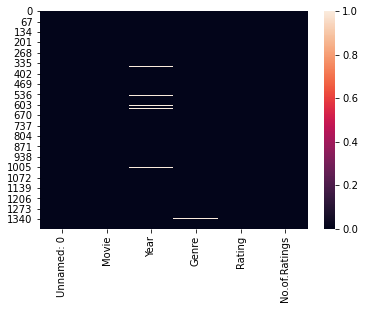

In [7]:
#Checking for nullvalues
sns.heatmap(df.isnull())

In [8]:
#Sorting by highest rating
df.sort_values(['Rating'], axis=0, 
                 ascending=False, inplace=True) 

In [9]:
df.head()

,Unnamed: 0,Movie,Year,Genre,Rating,No.of.Ratings
429,429,Pichhodu,2019.0,Drama,9.5,605
92,92,Maya Bazaar,1957.0,"Comedy, Drama, Family",9.2,3733
96,96,C/o Kancharapalem,2018.0,Drama,9.0,3699
145,145,Aha Naa Pellanta,1987.0,Comedy,8.9,2438
1383,1383,Screenplay of an Indian Love Story,2020.0,Drama,8.9,50


In [10]:
df['Year'].value_counts()

2019.0    94
2018.0    86
2016.0    65
2017.0    64
2015.0    61
          ..
1953.0     1
1958.0     1
1932.0     1
1952.0     1
1960.0     1
Name: Year, Length: 65, dtype: int64

In [11]:
df['Genre'] = df['Genre'].fillna('Unknown')
df['Year'] = df['Year'].fillna(0)

In [12]:
df.head()

,Unnamed: 0,Movie,Year,Genre,Rating,No.of.Ratings
429,429,Pichhodu,2019.0,Drama,9.5,605
92,92,Maya Bazaar,1957.0,"Comedy, Drama, Family",9.2,3733
96,96,C/o Kancharapalem,2018.0,Drama,9.0,3699
145,145,Aha Naa Pellanta,1987.0,Comedy,8.9,2438
1383,1383,Screenplay of an Indian Love Story,2020.0,Drama,8.9,50


In [13]:
df.isnull().sum()

Unnamed: 0       0
Movie            0
Year             0
Genre            0
Rating           0
No.of.Ratings    0
dtype: int64

In [14]:
df.dtypes

Unnamed: 0         int64
Movie             object
Year             float64
Genre             object
Rating           float64
No.of.Ratings      int64
dtype: object

In [15]:
df['Year'] = df['Year'].astype(int)

In [16]:
df.head()

,Unnamed: 0,Movie,Year,Genre,Rating,No.of.Ratings
429,429,Pichhodu,2019,Drama,9.5,605
92,92,Maya Bazaar,1957,"Comedy, Drama, Family",9.2,3733
96,96,C/o Kancharapalem,2018,Drama,9.0,3699
145,145,Aha Naa Pellanta,1987,Comedy,8.9,2438
1383,1383,Screenplay of an Indian Love Story,2020,Drama,8.9,50


# Weighted Average

## W = (Rv+ Cm)/v+m
#### W = Weighted Rating
#### R = Ratings given(1-10)
#### v = Number of votes given
#### C = Mean of R
#### m = Minimum votes required to be listed in top n positions 

In [17]:
R = df['Rating']
v = df['No.of.Ratings']
C = df['Rating'].mean()
m = df['No.of.Ratings'].quantile(0.75)

In [18]:
df['WeightedAverage'] = ((R*v)+(C*m))/(v+m)

In [19]:
df.head()

,Unnamed: 0,Movie,Year,Genre,Rating,No.of.Ratings,WeightedAverage
429,429,Pichhodu,2019,Drama,9.5,605,7.660021
92,92,Maya Bazaar,1957,"Comedy, Drama, Family",9.2,3733,8.676144
96,96,C/o Kancharapalem,2018,Drama,9.0,3699,8.508827
145,145,Aha Naa Pellanta,1987,Comedy,8.9,2438,8.244619
1383,1383,Screenplay of an Indian Love Story,2020,Drama,8.9,50,6.464130


In [20]:
df = df.sort_values('WeightedAverage',ascending = False)
df = df[['Movie','Rating','No.of.Ratings','WeightedAverage']]
df.head()

,Movie,Rating,No.of.Ratings,WeightedAverage
92,Maya Bazaar,9.2,3733,8.676144
96,C/o Kancharapalem,9.0,3699,8.508827
54,Jersey,8.6,6039,8.324457
31,Mahanati,8.5,8732,8.310738
9,Rangasthalam,8.4,17559,8.306100


Text(0, 0.5, 'Movies')

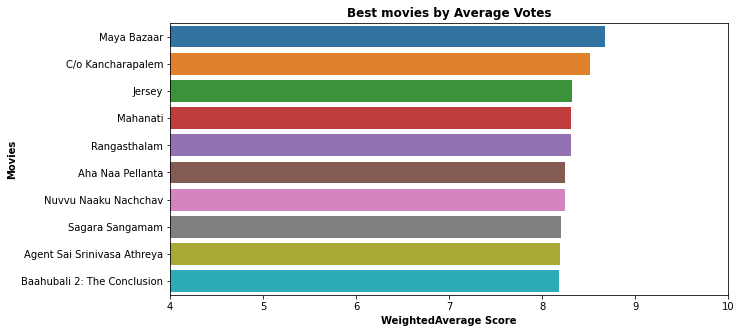

In [21]:
WeightedAverage = df.sort_values('WeightedAverage',ascending = False)
plt.figure(figsize=(10,5))
axis1 = sns.barplot(x = WeightedAverage['WeightedAverage'].head(10), y =WeightedAverage['Movie'].head(10))
plt.xlim(4,10)
plt.title('Best movies by Average Votes', weight='bold')
plt.xlabel('WeightedAverage Score', weight='bold')
plt.ylabel('Movies', weight='bold')

# Content Based

In [22]:
movie = 'TeluguMovies_dataset.csv'

In [23]:
df = pd.read_csv('TeluguMovies_dataset.csv')

In [24]:
df.head()

,Unnamed: 0,Movie,Year,Certificate,Genre,Overview,Runtime,Rating,No.of.Ratings
0,0,Bahubali: The Beginning,2015.0,UA,"Action, Drama","In ancient India, an adventurous and darin...",159,8.1,99114
1,1,Baahubali 2: The Conclusion,2017.0,UA,"Action, Drama","When Shiva, the son of Bahubali, learns ab...",167,8.2,71458
2,2,1 - Nenokkadine,2014.0,UA,"Action, Thriller",A rock star must overcome his psychologica...,170,8.1,42372
3,3,Dhoom:3,2013.0,UA,"Action, Thriller","When Sahir, a circus entertainer trained i...",172,5.4,42112
4,4,Ra.One,2011.0,U,"Action, Adventure, Sci-Fi",When the titular antagonist of an action g...,156,4.6,37211


In [25]:
df1 = pd.read_csv(movie, usecols=['Unnamed: 0','Movie','Genre','Overview'], dtype={'Unnamed: 0':'int32','Movie':'str','Genre':'str','Overview':'str'})

In [26]:
df1.head()

,Unnamed: 0,Movie,Genre,Overview
0,0,Bahubali: The Beginning,"Action, Drama","In ancient India, an adventurous and darin..."
1,1,Baahubali 2: The Conclusion,"Action, Drama","When Shiva, the son of Bahubali, learns ab..."
2,2,1 - Nenokkadine,"Action, Thriller",A rock star must overcome his psychologica...
3,3,Dhoom:3,"Action, Thriller","When Sahir, a circus entertainer trained i..."
4,4,Ra.One,"Action, Adventure, Sci-Fi",When the titular antagonist of an action g...


In [27]:
df1 = df1.rename(columns={"Unnamed: 0": "Index"})

In [28]:
df1.head()

,Index,Movie,Genre,Overview
0,0,Bahubali: The Beginning,"Action, Drama","In ancient India, an adventurous and darin..."
1,1,Baahubali 2: The Conclusion,"Action, Drama","When Shiva, the son of Bahubali, learns ab..."
2,2,1 - Nenokkadine,"Action, Thriller",A rock star must overcome his psychologica...
3,3,Dhoom:3,"Action, Thriller","When Sahir, a circus entertainer trained i..."
4,4,Ra.One,"Action, Adventure, Sci-Fi",When the titular antagonist of an action g...


In [29]:
df1['Genre'] = df1['Genre'].replace(np.nan, 'unknown')
df1['Genre'] = df1['Genre'].apply(lambda x: x.replace(', ',' '))
df1.head()

,Index,Movie,Genre,Overview
0,0,Bahubali: The Beginning,Action Drama,"In ancient India, an adventurous and darin..."
1,1,Baahubali 2: The Conclusion,Action Drama,"When Shiva, the son of Bahubali, learns ab..."
2,2,1 - Nenokkadine,Action Thriller,A rock star must overcome his psychologica...
3,3,Dhoom:3,Action Thriller,"When Sahir, a circus entertainer trained i..."
4,4,Ra.One,Action Adventure Sci-Fi,When the titular antagonist of an action g...


In [30]:
genres=[]
for genre in df1.Genre:
    
    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)    
Movie_title=[]
for title in df1.Movie:
    Movie_title.append(title[0:-7])
Movie_title=str(Movie_title)   

In [31]:
wordcloud_genre=WordCloud(width=1500,height=800,background_color='black',min_font_size=2
                    ,min_word_length=3).generate(genres)
wordcloud_title=WordCloud(width=1500,height=800,background_color='cyan',min_font_size=2
                    ,min_word_length=3).generate(Movie_title)

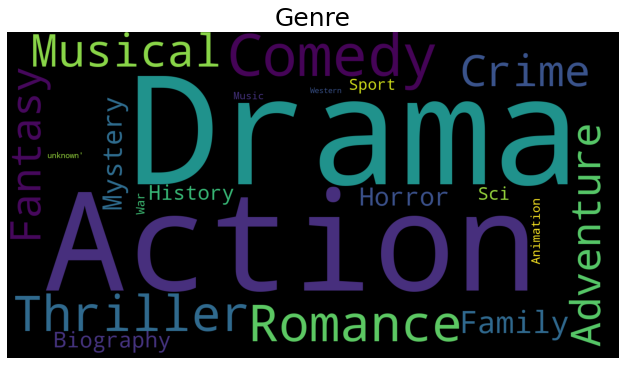

In [32]:
plt.figure(figsize=(20,6))
plt.axis('off')
plt.title('Genre',fontsize=25)
plt.imshow(wordcloud_genre)

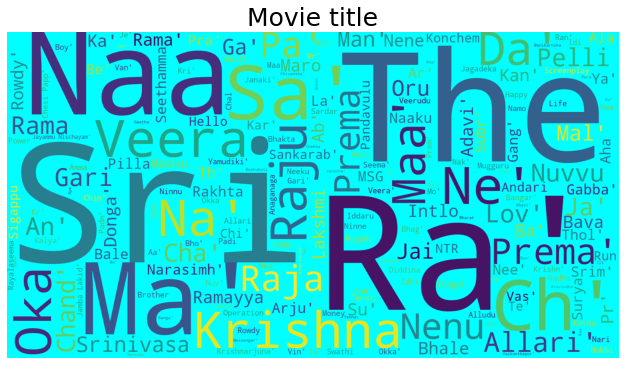

In [33]:
plt.figure(figsize=(20,6))
plt.axis('off')
plt.title('Movie title',fontsize=25)
plt.imshow(wordcloud_title)

In [34]:
df1.head()

,Index,Movie,Genre,Overview
0,0,Bahubali: The Beginning,Action Drama,"In ancient India, an adventurous and darin..."
1,1,Baahubali 2: The Conclusion,Action Drama,"When Shiva, the son of Bahubali, learns ab..."
2,2,1 - Nenokkadine,Action Thriller,A rock star must overcome his psychologica...
3,3,Dhoom:3,Action Thriller,"When Sahir, a circus entertainer trained i..."
4,4,Ra.One,Action Adventure Sci-Fi,When the titular antagonist of an action g...


In [35]:
features = ["Genre","Overview"]

In [36]:
for i in features:
    df1[i].fillna('',inplace=True)
def combine_features(row):
    try:
        return row['Genre']+' '+row['Overview']
    except:
        print("Error:",row)

In [37]:
df1['combined_features'] = df1.apply(combine_features,axis = 1)

In [38]:
df1

,Index,Movie,Genre,Overview,combined_features
0,0,Bahubali: The Beginning,Action Drama,"In ancient India, an adventurous and darin...","Action Drama In ancient India,..."
1,1,Baahubali 2: The Conclusion,Action Drama,"When Shiva, the son of Bahubali, learns ab...","Action Drama When Shiva, the s..."
2,2,1 - Nenokkadine,Action Thriller,A rock star must overcome his psychologica...,Action Thriller A rock star mu...
3,3,Dhoom:3,Action Thriller,"When Sahir, a circus entertainer trained i...","Action Thriller When Sahir, a ..."
4,4,Ra.One,Action Adventure Sci-Fi,When the titular antagonist of an action g...,Action Adventure Sci-Fi When t...
...,...,...,...,...,...
1395,1395,Maro Monagadu,unknown,,unknown
1396,1396,Jakkanna,Comedy Drama,The movie is about an attempt by Sunil the...,Comedy Drama The movie is abou...
1397,1397,Muvva Gopaludu,Drama Romance,Muvva Gopaludu is a 1987 Indian Telugu fil...,Drama Romance Muvva Gopaludu i...
1398,1398,Ninney Ishta Paddaanu,unknown,Hero Charan (Tarun) a middle class family ...,unknown Hero Charan (Tarun) a middle class...


In [39]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df1['combined_features'] = df1['combined_features'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df1['combined_features'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(1400, 5210)

In [40]:
#Array mapping from feature integer indices to feature name.
tfidf.get_feature_names()[1400:5210]

['duped',
 'durai',
 'duration',
 'durga',
 'duryodhana',
 'dutiful',
 'dwaraka',
 'dying',
 'dynamic',
 'dynamite',
 'dynasty',
 'early',
 'earn',
 'earned',
 'earning',
 'earns',
 'earth',
 'earthquake',
 'easier',
 'easily',
 'east',
 'easy',
 'easygoing',
 'eating',
 'eccentric',
 'echolocation',
 'ed',
 'eddie',
 'editor',
 'educated',
 'education',
 'eerie',
 'eeshwar',
 'effect',
 'effected',
 'effort',
 'effortlessly',
 'efforts',
 'ego',
 'egoes',
 'egoistic',
 'egyptians',
 'el',
 'elder',
 'elderly',
 'eldest',
 'election',
 'elections',
 'electrification',
 'electronics',
 'elements',
 'elephant',
 'eliminate',
 'elope',
 'eloped',
 'elopes',
 'eloping',
 'eloquent',
 'elusive',
 'embark',
 'embarks',
 'embrace',
 'embroiled',
 'emerges',
 'emotional',
 'emotionless',
 'emotions',
 'emperor',
 'empire',
 'employed',
 'employee',
 'employees',
 'employer',
 'employment',
 'employs',
 'encounter',
 'encounters',
 'end',
 'endangered',
 'endangers',
 'ended',
 'ends',
 'enemie

In [41]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [42]:
cosine_sim.shape

(1400, 1400)

In [43]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df1.index, index=df1['Movie']).drop_duplicates()

In [44]:
indices[:10]

Movie
Bahubali: The Beginning        0
Baahubali 2: The Conclusion    1
1 - Nenokkadine                2
Dhoom:3                        3
Ra.One                         4
Dhoom:2                        5
Eega                           6
Krrish 3                       7
Arjun Reddy                    8
Rangasthalam                   9
dtype: int64

In [45]:
from fuzzywuzzy import process
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = process.extractOne(title, df1['Movie'])[2]
    print('Movie selected:',df1['Movie'][idx])
    print('Recommendations based on selected movie are:')
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df1['Movie'].iloc[movie_indices]

In [46]:
get_recommendations('dhoom 3')

Movie selected: Dhoom:3
Recommendations based on selected movie are:


759                    Ganesh
1243             Super Police
1388           Gudachari No.1
520                   Golimar
5                     Dhoom:2
1310                   Terror
1366    Neeku Naaku Dash Dash
737               Arjun Reddy
845                      Bhai
1164             Lorry Driver
Name: Movie, dtype: object

In [47]:
get_recommendations('business man')

Movie selected: Business Man
Recommendations based on selected movie are:


1086        Surya IPS
619           Officer
323           Satya 2
549        Andhrawala
1121     D for Dopidi
1331    Parugo Parugu
1253    Balakrishnudu
162           Zanjeer
679            Toofan
1239    Ko antey koti
Name: Movie, dtype: object

In [48]:
get_recommendations('Nota')

Movie selected: Nota
Recommendations based on selected movie are:


274         Nene Raju Nene Mantri
632                          Lion
357                  Alex Pandian
759                        Ganesh
515                         Yaman
654                        Loafer
200            NTR: Kathanayakudu
598                   Prathinidhi
136    Cameraman Gangatho Rambabu
232                  Run Baby Run
Name: Movie, dtype: object

In [49]:
get_recommendations('hit')

Movie selected: HIT
Recommendations based on selected movie are:


1380                    Raaj
117                    Evaru
535                   Vikram
211               Oh Baby...
311                   Premam
1033                 Valayam
242               Karthikeya
503     Anaganaga O Dheerudu
561         Yuddham Sharanam
423                 Pournami
Name: Movie, dtype: object

In [50]:
get_recommendations('beeshma')

Movie selected: Bheeshma
Recommendations based on selected movie are:


491                              Raja
469                    Aadhi Bhagavan
889                     Sundara Kanda
975             Srivaariki Premalekha
1034                      Babai Abbai
1171                  Peddinti Alludu
1176                  Gharana Bullodu
1254                           Partha
792     Avunu Valliddaru Ishtapaddaru
995                   Pavitra Bandham
Name: Movie, dtype: object